In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
data=pd.read_csv('synthetic_sales_advertising_dataa.csv')

In [33]:
print(data.head())

   TV_Spend  Radio_Spend  Newspaper_Spend  Online_Spend   Sales
0    596.75      1347.13           356.31       1777.81  234.66
1   3328.99      1909.47           179.39       2726.02  457.29
2   2475.41       451.88           568.08        959.57  299.38
3   3931.73      1783.29           260.25       2807.52  481.42
4   4199.53      1065.34           338.98        946.13  323.24


In [34]:
print(data.isnull().sum())

TV_Spend           26
Radio_Spend        25
Newspaper_Spend    25
Online_Spend       25
Sales               0
dtype: int64


In [35]:
print(data.describe())

          TV_Spend  Radio_Spend  Newspaper_Spend  Online_Spend        Sales
count   484.000000   485.000000       485.000000    485.000000   510.000000
mean   2829.609835  1029.662000       512.528351   1528.912866   356.288950
std    1330.220397   546.267683       278.247431    831.079468   150.820700
min     502.570000   104.940000        51.050000    102.380000    66.540000
25%    1671.627500   547.520000       274.690000    804.370000   278.735000
50%    2816.120000  1043.000000       497.100000   1515.230000   340.100000
75%    4084.660000  1486.420000       757.510000   2206.920000   413.842500
max    4998.250000  1999.860000       997.340000   2991.750000  1683.232103


In [36]:
data.fillna(data.mean(),inplace=True)

In [37]:
print(data.isnull().sum())
print(data.head())

TV_Spend           0
Radio_Spend        0
Newspaper_Spend    0
Online_Spend       0
Sales              0
dtype: int64
   TV_Spend  Radio_Spend  Newspaper_Spend  Online_Spend   Sales
0    596.75      1347.13           356.31       1777.81  234.66
1   3328.99      1909.47           179.39       2726.02  457.29
2   2475.41       451.88           568.08        959.57  299.38
3   3931.73      1783.29           260.25       2807.52  481.42
4   4199.53      1065.34           338.98        946.13  323.24


In [41]:
data.rename(columns={'TV_Spend': 'TV', 'Radio_Spend': 'Radio', 'Newspaper_Spend': 'Newspaper', 'Online_Spend': 'Online'},inplace=True)

In [42]:
print(data.head())

        TV    Radio  Newspaper   Online   Sales
0   596.75  1347.13     356.31  1777.81  234.66
1  3328.99  1909.47     179.39  2726.02  457.29
2  2475.41   451.88     568.08   959.57  299.38
3  3931.73  1783.29     260.25  2807.52  481.42
4  4199.53  1065.34     338.98   946.13  323.24


In [43]:
print(data.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Online       float64
Sales        float64
dtype: object


In [48]:
data['Total_Spend'] = data['TV'] + data['Radio'] + data['Newspaper'] + data['Online']

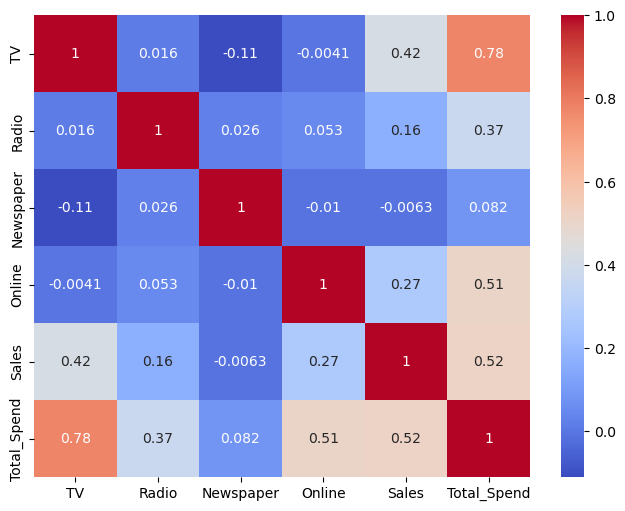

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [47]:
scaler = StandardScaler()
features = ['TV', 'Radio', 'Newspaper', 'Online', 'Total_Spend']
data[features] = scaler.fit_transform(data[features])

In [54]:
x=data[['TV', 'Radio', 'Newspaper', 'Online', 'Total_Spend']]
y=data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
print('training data')
print(x_train)
print(y_train)
print('testing data')
print(x_test)
print(y_test)

training data
           TV     Radio     Newspaper        Online  Total_Spend
310 -0.412265 -0.156667 -6.182477e-02 -1.086343e+00    -1.717100
349 -1.750226  0.901697  3.226259e-01  4.022531e-02    -0.485678
485 -1.314338  1.543401 -6.722016e-01 -3.518485e-01    -0.794987
137 -1.588206 -1.461385 -7.197806e-17  8.447158e-01    -2.204875
497  1.074869 -1.168353 -7.197806e-17 -3.483053e-17    -0.093484
..        ...       ...           ...           ...          ...
106 -0.170309  0.581399  3.641293e-01 -9.758835e-01    -0.200664
270 -0.669525  0.344403  8.287093e-01 -1.710230e+00    -1.206642
348  1.414421 -0.792508 -1.044773e+00  1.458079e+00     1.035219
435 -0.246954  1.661692  1.362646e+00 -8.696359e-01     1.907748
102  0.549312 -1.253177 -1.389454e+00 -9.792555e-01    -3.072575

[408 rows x 5 columns]
310    276.31
349    228.11
485    244.34
137    220.53
497    412.23
        ...  
106    270.18
270    196.43
348    441.52
435    308.36
102    249.75
Name: Sales, Length: 408, dt

In [56]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = model.predict(x_test)

In [61]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error:{mse}')
print(f'R2 Score :{r2}')

Mean Squared Error:7087.435105109438
R2 Score :0.42621747883705063


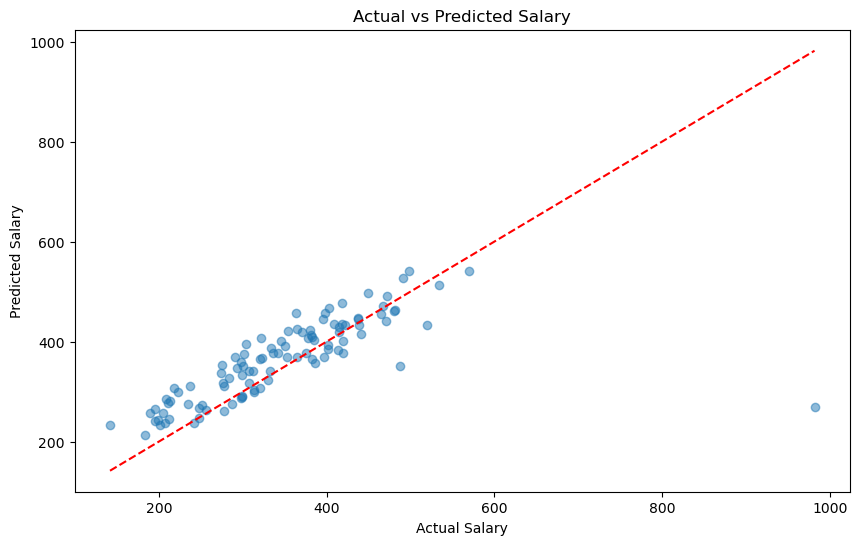

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [64]:
results=pd.DataFrame({'Actual Sales':y_test,'Predicted Sales':y_pred})

print(results.head())

     Actual Sales  Predicted Sales
480        319.88       306.326526
449        273.91       336.475644
475        467.62       470.905865
434        413.27       383.706082
368        306.86       316.705605
